In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

<h1>3 CONVOLUTIONAL LAYER ARCHITECTURE</h1>

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 303s 5ms/step - loss: 0.2738 - acc: 0.9167 - val_loss: 0.0574 - val_acc: 0.9818
Epoch 2/12
60000/60000 [==============================] - 298s 5ms/step - loss: 0.0952 - acc: 0.9721 - val_loss: 0.0452 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 298s 5ms/step - loss: 0.0742 - acc: 0.9786 - val_loss: 0.0584 - val_acc: 0.9839
Epoch 4/12
60000/60000 [==============================] - 299s 5ms/step - loss: 0.0664 - acc: 0.9808 - val_loss: 0.0412 - val_acc: 0.9865
Epoch 5/12
60000/60000 [==============================] - 300s 5ms/step - loss: 0.0629 - acc: 0.9826 - val_loss: 0.0389 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 298s 5ms/step - loss: 0.0619 - acc: 0.9836 - val_loss: 0.0474 - val_acc: 0.9866
Epoch 7/12
60000/60000 [=========================

Test score: 0.06882046415213076
Test accuracy: 0.988


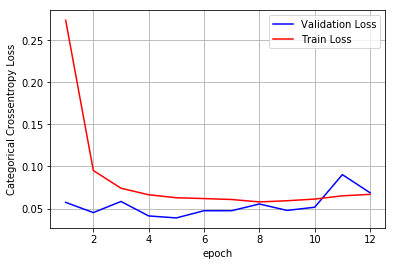

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1>5 COVOLUTIONAL LAYER ARCHITECTURE</h1>

In [0]:
from keras import optimizers
from keras.layers import BatchNormalization

In [0]:
model = Sequential()
#layer 1 
model.add(Conv2D(32, kernel_size=5,input_shape=input_shape, activation = 'relu'))


model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer 2 
model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
#layer 3
model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model.add(MaxPooling2D(2,2))

#layer 4
model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
#layer 5
model.add(Conv2D(256, kernel_size=3, activation = 'relu'))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation = "softmax"))


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1623 - acc: 0.9530 - val_loss: 0.0411 - val_acc: 0.9868
Epoch 2/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0740 - acc: 0.9795 - val_loss: 0.0374 - val_acc: 0.9894
Epoch 3/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0522 - acc: 0.9854 - val_loss: 0.0382 - val_acc: 0.9889
Epoch 4/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0414 - acc: 0.9886 - val_loss: 0.0285 - val_acc: 0.9918
Epoch 5/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0362 - acc: 0.9900 - val_loss: 0.0293 - val_acc: 0.9919
Epoch 6/12
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0320 - acc: 0.9910 - val_loss: 0.0251 - val_acc: 0.9938
Epoch 7/12
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0260 - acc: 0.9931 - val_loss: 0.0292 - 

Test score: 0.033296560610108966
Test accuracy: 0.9917


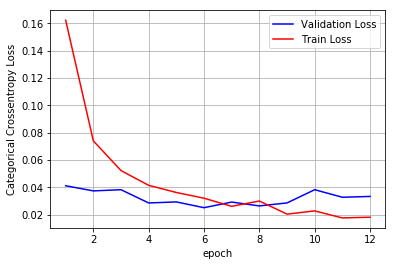

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1>7 CONVOLUTION LAYER ARCHITECTURE<h1>

In [0]:
model = Sequential()
#layer 1
model.add(Conv2D(32, kernel_size=3,input_shape=input_shape, activation = 'relu'))
#layer 2
model.add(Conv2D(32, kernel_size=3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer 3
model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
#layer 4
model.add(Conv2D(64, kernel_size=3,activation = 'relu'))

model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer 5
model.add(Conv2D(128, kernel_size=5, activation = 'relu'))
model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
model.add(BatchNormalization())
# layer 7
model.add(Conv2D(256, kernel_size=3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation = "softmax"))


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 206s 3ms/step - loss: 0.3546 - acc: 0.8854 - val_loss: 0.0588 - val_acc: 0.9845
Epoch 2/12
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0912 - acc: 0.9743 - val_loss: 0.0334 - val_acc: 0.9894
Epoch 3/12
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0671 - acc: 0.9811 - val_loss: 0.0305 - val_acc: 0.9917
Epoch 4/12
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0545 - acc: 0.9849 - val_loss: 0.0219 - val_acc: 0.9939
Epoch 5/12
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0495 - acc: 0.9857 - val_loss: 0.0227 - val_acc: 0.9941
Epoch 6/12
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0449 - acc: 0.9875 - val_loss: 0.0210 - val_acc: 0.9937
Epoch 7/12
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0409 - acc: 0.9891 - val_loss: 0.0205 - 

Test score: 0.015736917383669696
Test accuracy: 0.9953


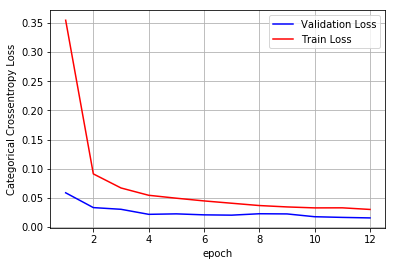

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1> FEW More ARchitecture </h1>

__simple model without batch normalization or dropout__ 

In [0]:
model= Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=input_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation = "softmax"))

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2345 - acc: 0.9274 - val_loss: 0.0438 - val_acc: 0.9845
Epoch 2/12
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0753 - acc: 0.9794 - val_loss: 0.0395 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0524 - acc: 0.9844 - val_loss: 0.0258 - val_acc: 0.9912
Epoch 4/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0414 - acc: 0.9881 - val_loss: 0.0281 - val_acc: 0.9923
Epoch 5/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0326 - acc: 0.9909 - val_loss: 0.0285 - val_acc: 0.9917
Epoch 6/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0290 - acc: 0.9914 - val_loss: 0.0235 - val_acc: 0.9927
Epoch 7/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0244 - acc: 0.9930 - val_loss: 0.0204 - val_acc

Test score: 0.021570019691434437
Test accuracy: 0.9937


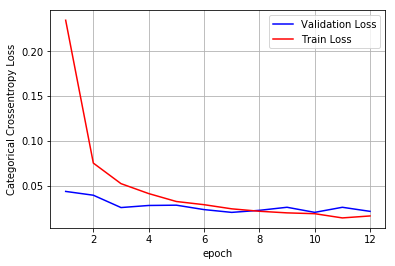

In [8]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

__with weights initialization and sigmoid function__

In [10]:
model= Sequential()
model.add(Conv2D(32, (3, 3),init='glorot_uniform', padding="same",input_shape=input_shape, activation="sigmoid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), init='glorot_uniform',padding="same", activation="sigmoid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3),init='glorot_uniform', padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation = "sigmoid"))
model.add(Dropout(0.4))
model.add(Dense(128, activation = "sigmoid"))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation = "softmax"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1..., activation="sigmoid", kernel_initializer="glorot_uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="sigmoid", kernel_initializer="glorot_uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", activation="relu", kernel_initializer="glorot_uniform")`
  


In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adagrad',
              metrics=['accuracy'])
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 98s 2ms/step - loss: 2.3188 - acc: 0.1052 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 97s 2ms/step - loss: 2.3019 - acc: 0.1102 - val_loss: 2.3015 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 97s 2ms/step - loss: 2.3018 - acc: 0.1118 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 97s 2ms/step - loss: 2.3015 - acc: 0.1121 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 97s 2ms/step - loss: 2.3014 - acc: 0.1123 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 97s 2ms/step - loss: 2.3013 - acc: 0.1123 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 97s 2ms/step - loss: 2.3014 - acc: 0.1121 - val_loss: 2.3010 - val_acc

Test score: 0.049031224502064284
Test accuracy: 0.9852


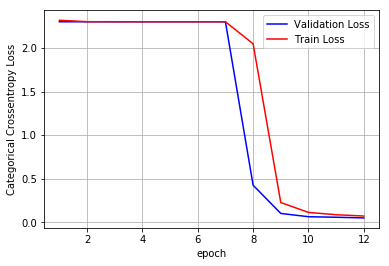

In [12]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
model= Sequential()
model.add(Conv2D(32, (3, 3), padding="valid",input_shape=input_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation = "softmax"))

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 60s 1ms/step - loss: 0.7028 - acc: 0.7663 - val_loss: 0.1179 - val_acc: 0.9642
Epoch 2/12
60000/60000 [==============================] - 60s 993us/step - loss: 0.2219 - acc: 0.9375 - val_loss: 0.0804 - val_acc: 0.9754
Epoch 3/12
60000/60000 [==============================] - 59s 982us/step - loss: 0.1747 - acc: 0.9510 - val_loss: 0.0672 - val_acc: 0.9813
Epoch 4/12
60000/60000 [==============================] - 58s 968us/step - loss: 0.1459 - acc: 0.9589 - val_loss: 0.0628 - val_acc: 0.9819
Epoch 5/12
60000/60000 [==============================] - 58s 971us/step - loss: 0.1325 - acc: 0.9643 - val_loss: 0.0623 - val_acc: 0.9820
Epoch 6/12
60000/60000 [==============================] - 58s 973us/step - loss: 0.1175 - acc: 0.9667 - val_loss: 0.0486 - val_acc: 0.9866
Epoch 7/12
60000/60000 [==============================] - 58s 968us/step - loss: 0.1115 - acc: 0.9691 - val_loss: 0.04

Test score: 0.039374526307734775
Test accuracy: 0.9886


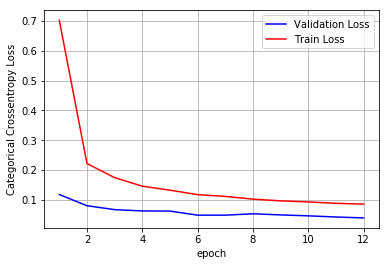

In [16]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h1>CONCLUSION</h1>

In [22]:
#!/usr/bin/python3

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Layers","TECHNIQUES USED" ,"Accuracy ", "Loss"]

x.add_row(["3 LAYERS ARCHITECTURE","Pooling Dropout",0.988, 0.068])
x.add_row(["5 LAYERS ARCHITECTURE","Pooling , Dropout, BatchNormalization",0.9917, 0.33 ])
x.add_row(["7 LAYERS ARCHITECTURE","Pooling , Dropout, BatchNormalization",0.9953,0.015 ])
x.add_row(["SIMPLE ARCHITECTURE","Pooling",0.9938,0.0215 ])
x.add_row(["SIMPLE ARCHITECTURE with Sigmoid Activation","weight Initialization,Pooling,Dropout,Padding ='valid'",0.9852,0.049 ])
x.add_row(["SIMPLE ARCHITECTURe and Different Dropout Rate","Pooling,Dropout,Paddin='valid'",0.9886,0.039 ])

print(x)

+------------------------------------------------+--------------------------------------------------------+-----------+--------+
|                     Layers                     |                    TECHNIQUES USED                     | Accuracy  |  Loss  |
+------------------------------------------------+--------------------------------------------------------+-----------+--------+
|             3 LAYERS ARCHITECTURE              |                    Pooling Dropout                     |   0.988   | 0.068  |
|             5 LAYERS ARCHITECTURE              |         Pooling , Dropout, BatchNormalization          |   0.9917  |  0.33  |
|             7 LAYERS ARCHITECTURE              |         Pooling , Dropout, BatchNormalization          |   0.9953  | 0.015  |
|              SIMPLE ARCHITECTURE               |                        Pooling                         |   0.9938  | 0.0215 |
|  SIMPLE ARCHITECTURE with Sigmoid Activation   | weight Initialization,Pooling,Dropout,Padding 

<h1>SUMMARY :-
(what i have done)</h1>
1.The model type that we will be using is Sequential. Sequential is the    easiest way to build a model in Keras. It allows you to build a model layer by layer.

2.we use add to add layers in our model.<br>

3.Kernel means the size of filter matrix we use.<br>
3 x 3 kernel means the kernel we are using is of size 3<br>

4.Activation function we use is RELU and Sigmoid.Refer this for more information.(https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)<br>

5.In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers.<br>

6.Dense is the layer type we will use in for our output layer. we will use dense because in general we use dense layer for neural network.

7.We are using softmax in last layer because our problem is MNIST which is multiclass classification problem.

8.After adding all the layers we need to compile the model.It consists of three parameters loss optimizer and metrics.

9, then we fit our model to check the accuracy of train and test dataset after compiling.



<h1> OBSERVATION </h1>
1.i have tried three different architecture 3 layer , 5 layer and 7 layer architecture.<br>
2.i applied various techniques to increase accuracy (like Batch Normalization , Dropout etc)<br>
3.i get the highes accurcy of 0.9953 by 7 layer.<br>
4.when i use simoid activation we are getting accuracy of 0.10 upto 5 epochs after that it starts increasing.

<h1>END</h1>